In [1]:
import numpy as np
import pandas as pd
from pandas.core.nanops import nanmean as pd_nanmean
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
ori = pickle.load(open("wave-ori.pkl", "rb"))
evl = pickle.load(open("wave-focal.pkl", "rb"))

realy = ori["real12"]
realy = pd.DataFrame(realy)
realy.replace(to_replace=0, method='ffill', inplace=True)

In [3]:
realy = np.array(realy)

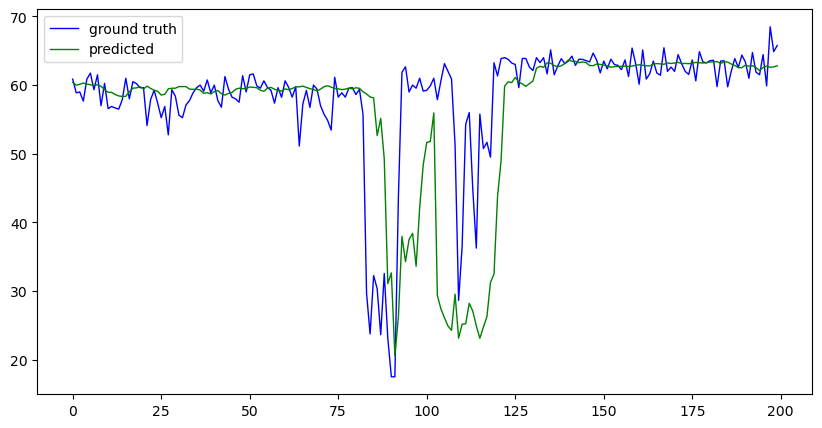

In [9]:
ori_preds = ori["pred12"]
preds = evl["pred12"]

fig = plt.figure(figsize=(12, 8))
upper = 3600
lower = 3200
location = 143
plt.plot(range(upper - lower), realy[lower:upper, location], label='ground truth', linewidth=1, c = 'b')
plt.plot(range(upper - lower), preds[lower:upper, location], label='focal loss', linewidth=1, c='r')
plt.plot(range(upper - lower), ori_preds[lower:upper, location], label='mae', linewidth=1, c='g')
plt.legend()

In [33]:
import ruptures as rpt
import numpy as np
tsd = np.array(realy)[:, location]
detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=3)

In [34]:
def plot_change_points_ruptures(ts, ts_change_all, stds, title):
    
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for i in range(len(ts_change_all)):
        idx = ts_change_all[i]
        x = idx
        if stds[i] > np.mean(stds) + np.std(stds):
            plt.axvline(x, lw=1, color='orange')
        else:
            plt.axvline(x, lw=1, color='gray')

    plt.title(title)
    plt.show()

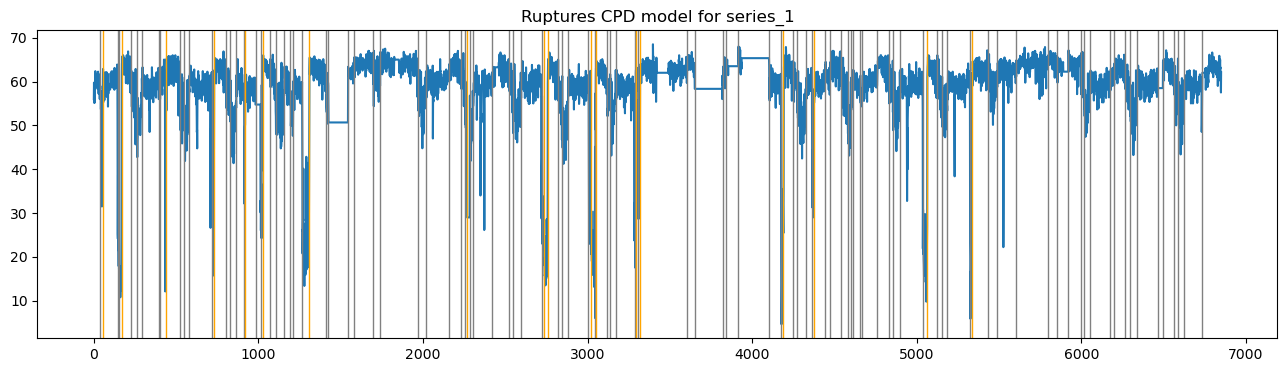

In [35]:
stds = []
prev = 0
for i in range(len(change_points)):
    cur = change_points[i]
    if i > 0:
        prev = change_points[i-1]
    stds.append(np.std(tsd[prev:cur]))

plot_change_points_ruptures(tsd, change_points[:-1], stds, 'Ruptures CPD model for series_1')

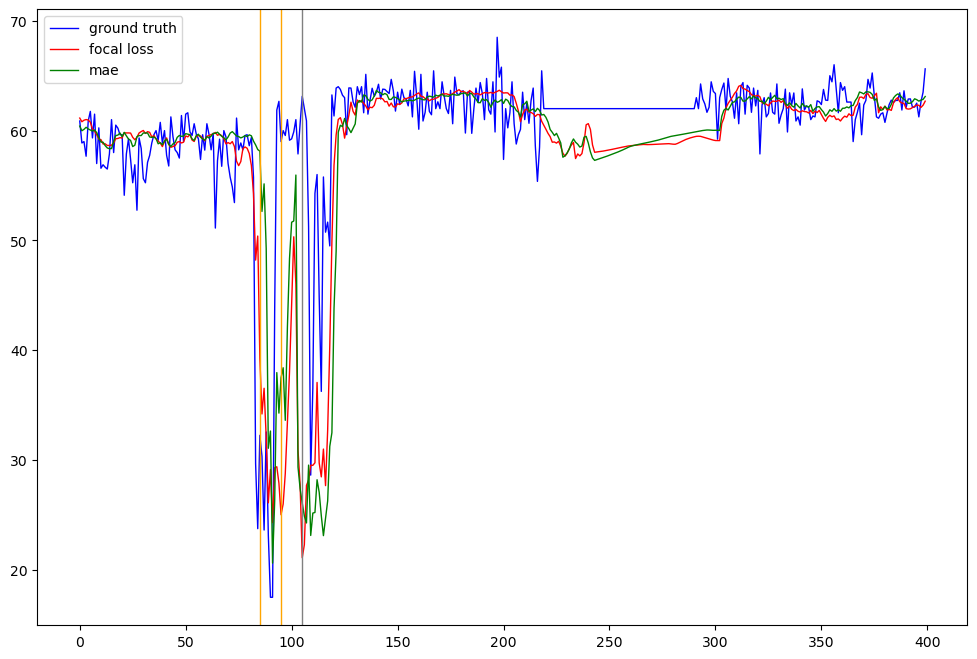

In [36]:
start = lower
end = upper
subset = []
for i in range(len(change_points)):
    if change_points[i] > start and change_points[i] < end:
        subset.append(i)

plt.figure(figsize=(12,8))
plt.plot(range(upper - lower), realy[lower:upper, location], label='ground truth', linewidth=1, c = 'b')
plt.plot(range(upper - lower), preds[lower:upper, location], label='focal loss', linewidth=1, c='r')
plt.plot(range(upper - lower), ori_preds[lower:upper, location], label='mae', linewidth=1, c='g')
plt.legend()
for i in range(len(change_points[subset[0]: subset[-1]])):
    idx = change_points[subset[0]: subset[-1]][i]
    x = idx - start
    if stds[subset[0]: subset[-1]][i] > np.mean(stds):
        plt.axvline(x, lw=1, color='orange')
    else:
        plt.axvline(x, lw=1, color='gray')